In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_failure = 'pdm_failures_data.csv'
file_err = 'pdm_errors_data.csv'
file_maint = 'pdm_maint_data.csv'
file_machine = 'pdm_machines_data.csv'
file_reading = 'pdm_telemetry_data.csv'

## Machine Dataset



In [4]:
df_machine = pd.read_csv(file_machine, encoding='utf-8')
df_machine.head()

,machineID,model,age
0,501,model4,6
1,502,model4,4
2,1,model2,18
3,503,model4,3
4,504,model2,19


In [5]:
for c, tp , num in zip(df_machine.columns.tolist(), df_machine.dtypes, df_machine.count()):
    print("%10s, %10s, %6d" % (c, tp, num))
print("age: min value {}, max value {} ".format(df_machine['age'].min(), df_machine['age'].max()))
print("unique value of model", df_machine['model'].unique())

 machineID,      int64,   1000
     model,     object,   1000
       age,      int64,   1000
age: min value 0, max value 20 
unique value of model ['model4' 'model2' 'model3' 'model1']


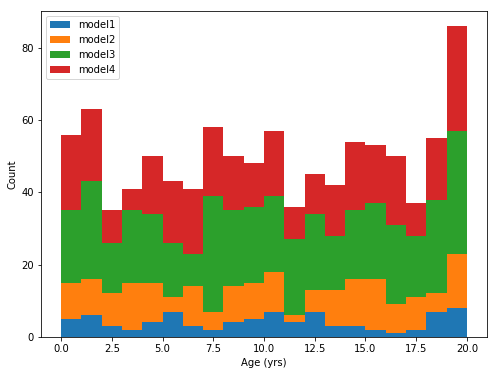

In [6]:
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([df_machine.loc[df_machine['model'] == 'model1', 'age'],
                       df_machine.loc[df_machine['model'] == 'model2', 'age'],
                       df_machine.loc[df_machine['model'] == 'model3', 'age'],
                       df_machine.loc[df_machine['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

## Errors data set



In [7]:
df = pd.read_csv(file_err, encoding='utf-8')
df.head(3)

,datetime,machineID,errorID
0,2015-01-28 06:00:00.0000000,383,error4
1,2015-02-17 06:00:00.0000000,530,error5
2,2015-01-22 06:00:00.0000000,531,error5


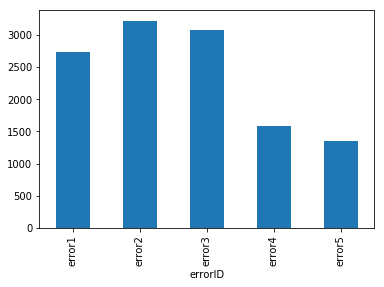

In [8]:
g = df.groupby('errorID').count()
g['machineID'].plot.bar()

## Maintenance data set




In [9]:
df = pd.read_csv(file_maint, encoding='utf-8')
print(df.count())
df.head(3)

datetime     32592
machineID    32592
comp         32592
dtype: int64


,datetime,machineID,comp
0,2015-04-01 06:00:00.0000000,476,comp1
1,2015-05-01 06:00:00.0000000,476,comp1
2,2015-10-13 06:00:00.0000000,476,comp1


In [10]:
print(len(df['machineID'].unique()))
print(df['comp'].unique())


1000
['comp1' 'comp3' 'comp2' 'comp4']


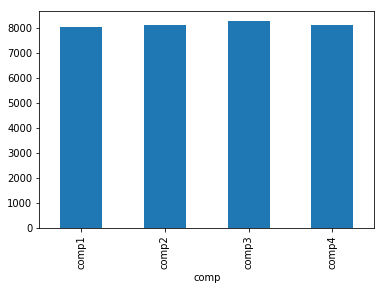

In [11]:
g = df.groupby('comp').count()
g['machineID'].plot.bar()

## Telemetry data set 



In [23]:
df = pd.read_csv(file_reading, encoding = 'utf-8')
print(df.count())
df.head(3)

datetime     8761000
machineID    8761000
volt         8761000
rotate       8761000
pressure     8761000
vibration    8761000
dtype: int64


,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,151.919999,530.813578,101.788175,49.604013
1,2015-08-17 10:00:00,1,190.196168,429.802877,98.929586,37.879881
2,2015-08-17 11:00:00,1,162.879976,426.977163,115.841384,46.713267


In [24]:
print(df.isnull().any().any())
print(df.dtypes)

False
datetime      object
machineID      int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
dtype: object


### draw readings machineID=1, datetime between 2015/2/1 and 2015/3/1

In [41]:
plt_data = df.loc[df['machineID']==1].copy()
plt_data['datetime'] = pd.to_datetime(plt_data['datetime'], format="%Y-%m-%d %H:%M:%S")
plot_df = plt_data.loc[(plt_data['datetime'] >= pd.to_datetime('2015-02-01')) &
                       (plt_data['datetime'] <= pd.to_datetime('2015-03-01'))]
plot_df.index = plot_df['datetime']
plot_df.head()
# plot_df[['datetime', 'volt']].plot.line()

,datetime,machineID,volt,rotate,pressure,vibration
datetime,,,,,,
2015-02-15 22:00:00,2015-02-15 22:00:00,1,182.888119,443.423831,114.284153,36.019042
2015-02-15 23:00:00,2015-02-15 23:00:00,1,184.127529,377.555451,114.278643,46.233664
2015-02-16 00:00:00,2015-02-16 00:00:00,1,185.931974,447.034920,107.828932,41.388365
2015-02-16 01:00:00,2015-02-16 01:00:00,1,159.648428,483.766450,92.760328,45.745425
2015-02-16 02:00:00,2015-02-16 02:00:00,1,165.971932,421.011403,108.285382,40.798281


Text(0, 0.5, 'vibration')

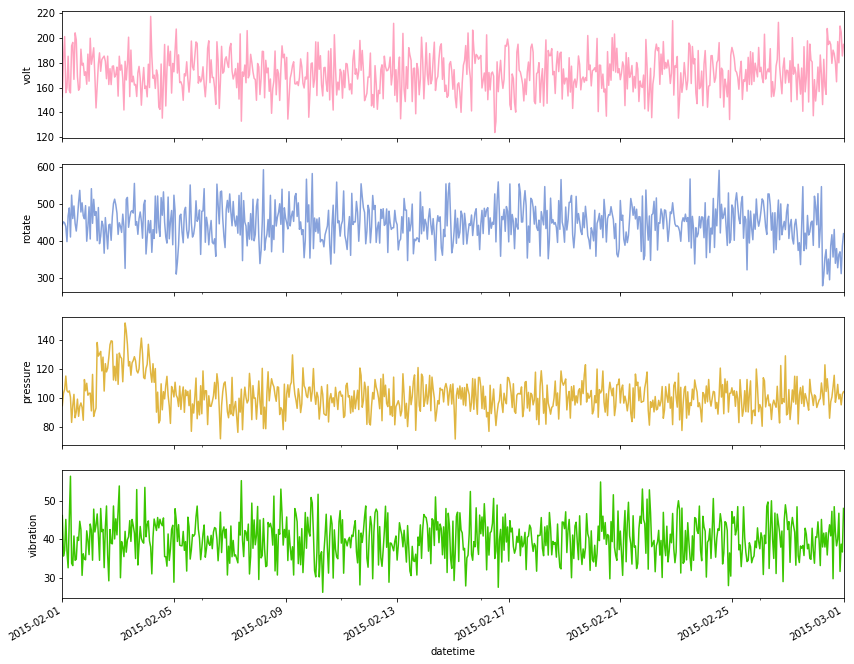

In [61]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12), sharex=True)
plot_df['volt'].plot(ax=ax1,c='#ffa3bf')
plot_df['rotate'].plot(ax=ax2, c='#86a1db')
plot_df['pressure'].plot(ax=ax3, c='#e0b641')
plot_df['vibration'].plot(ax=ax4, c='#3bc600')
ax1.set_ylabel('volt')
ax2.set_ylabel('rotate')
ax3.set_ylabel('pressure')
ax4.set_ylabel('vibration')

## Failures data set 



In [4]:
df = pd.read_csv(file_failure, index_col=['datetime', 'machineID'], parse_dates=True, encoding='utf-8')
df.sort_index(inplace=True)
df.head(10)

failure
datetime            machineID        
2015-01-02 03:00:00 2           comp2
                    8           comp1
                    18          comp1
                    18          comp4
                    23          comp2
                    27          comp3
                    32          comp4
                    37          comp2
                    38          comp2
                    39          comp3

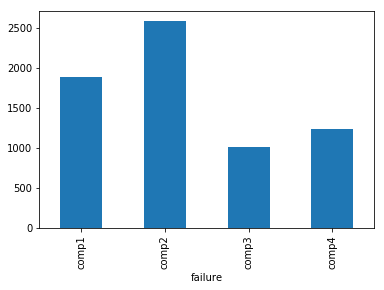

In [65]:
g = df.groupby('failure').count()
g['machineID'].plot.bar()